# 可选作业: 线性回归

## 说明与要求

参考本题目中提供的数据，给出城市人口数目对饮品连锁店利润影响的关系模型。

* 按照给出数据和程序完成线性回归分析练习
* 本练习全部数据和代码均包含在这个notebook中。 选做此作业的同学在提交时，应将全部信息作业信息包含到此文档中，以报告形式提交，并保证代码可以正常运行。
* 扩展：使用回归分析为自己的课题、或实际中的某些现象建模，通过调查或网络搜索取得数据集，以本节课介绍内容和本作业为参考，给出模型和求解过程。


练习开始之前，我们所需的Python库导入此编程练习所需的所有库。练习提供的代码使用[`numpy`](http://www.numpy.org/)库完成所有向量和矩阵运算，并所以用[`matplotlib`](https://matplotlib.org/)绘图。 

需要安装Python支持包和相应的库时，推荐可直接安装[`Anaconda`](https://mirror.tuna.tsinghua.edu.cn/help/anaconda/)，它包含了大多数常用的库，清华大学提供了软件下载镜像。

In [89]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']  # needed to plot Chinese

# tells matplotlib to embed plots within the notebook
%matplotlib inline
np.set_printoptions(precision=5)

## 代码调试


注意事项:

- Python数组从0开始 (OCTAVE/MATLAB 从1开始). 

- 如果在运行时看到了许多错误提示，请检查你的矩阵维度，可以使用np.shape或M.shape打印出矩阵的尺寸进行调试。

- 默认情况下，numpy的矩阵运算操作符执行的是逐元素运算。 如果你想要做矩阵乘法，则需要使用numpy的.dot函数。 例如，如果A和B是两个numpy矩阵，则矩阵运算A\*B是np.dot(A, B)。 对于2维矩阵或向量（1维），这也相当于A@B（Python version> = 3.5）


## 1 单变量线性回归

假设你是一家连锁餐厅的CEO，正在考虑在不同的城市开设一家新餐厅。这个连锁店已经在各个城市有了销售点，你可以得到城市的利润和人口数据。你考虑使用这些数据来帮助选择要扩展到哪一个城市。

文件`Data/ex1data1.txt` 中包含了包含我们的线性回归问题的数据集。第一列是一个城市的人口，单位为万，第二列是相应城市的食品点利润(万美元)。利润为负值表示亏损。以下代码提供了加载此数据的功能：数据集从数据文件加载到 `x` and `y`:

注意：如果本段代码出错，请先运行上一个代码段，并检查当前目录数据的完整性。

In [90]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X_origin, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples
print("Load {} items".format(m))

Load 97 items


### 1.1 绘制

在开始任何数据处理任务之前，通过可视化来理解数据通常是有用的。对于这个数据集，可以使用散点图来可视化数据，因为它只有两个属性可以绘制(利润和人口)。考虑到在现实生活中遇到的许多其他问题都是具有更高的维度，不能在二维图上绘制。python中有许多绘图库([blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/))。

我们使用常用的`matplotlib`来做所有的绘图。`matplotlib`是python中最流行的科学绘图库之一，它具有丰富的工具和函数来生成漂亮的绘图。pyplot是matplotlib中的一个模块，它模仿MATLAB的绘图接口，为matplotlib最常见的绘图任务提供了一个简化的接口，下面给出一个示例：

```
plt.plot(x, y, 'ro', ms=10, mec='k')
plt.ylabel('Profit in ￥10,000')
plt.xlabel('Population of City in 10,000s')
```


In [91]:
# -*- coding: utf-8 -*-
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = plt.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    color = ['red'] * len(y)
    plt.scatter(x, y, c=color)
    plt.ylabel('利润(万美元)')
    plt.xlabel('城市人口(万人)')

    # =============================================================


填写上述函数,然后运行函数，尝试绘制数据的散点图。

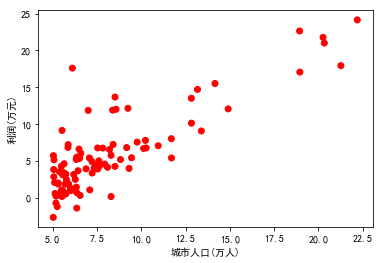

In [81]:
plotData(X_origin, y)

可以尝试使用不同参数控制绘图效果，使用命令`?plt.plot`或'?plt.scatter`可以看到 `matplotlib` plot或scatter函数的详细帮助，也可以在晚上搜索plot函数的实例。

In [82]:
?plt.scatter

<a id="section2"></a>
### 1.2 梯度下降

在这个部分我们将使用梯度下降法从数据中估计参数 $\theta$.

#### 1.2.1 更新公式

线性回归的目标是最小化目标函数，或者说是优化性能函数。

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

这里的假设 $h_\theta(x)$是一个简单的一阶线性函数组合
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

注意，模型中的待求参数是 $\theta_j$ ，为找到能够最小化目标函数的 $J(\theta)$. 
我们使用一种简单的梯度下降法——批梯度下降(Batch Gradient Descent ), 每个步骤中更新方式如下：

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

每一个步骤都使参数$\theta_j$ 向最优值逐渐逼近，并最终达到 J($\theta$)的最小值。

<div class="alert alert-block alert-warning">
**实现时应注意:** 样本存储在矩阵$X$ 的每一行中，$X$使用Python `numpy`. 考虑到方程中存在 ($\theta_0$), 我们为 $X$ 添加一列，并设置值都为1，这使我们可以直接把$\theta_0$当作一个额外的特征统一处理。
</div>


#### 1.2.2 实现

为处理$\theta_0$，添加一列1到$X$。

In [92]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X_origin], axis=1)

<a id="section2"></a>
#### 1.2.3 计算目标函数$J(\theta)$

当使用梯度下降法最小化 $J(\theta)$时, 需要计算目标函数的值来检查收敛的情况。这里实现了一个用于计算
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
的函数`computeCost` ，其输入是由 $\theta_0$的系数和数据样本组成的新变量$X$, $y$和$\theta$，每个样本占据一行。
<a id="computeCost"></a>

In [98]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    n = X.shape[1]
    assert(len(theta) == n)  

    hx = np.dot(X,theta)    
    dif =  hx - y
    J = np.sum(dif**2) / (2*m)    
    # ===========================================================
    return J

一旦你完成computeCost()，使用两种不同的初始化参数运行两次进行测试，检查结果的正确性。

In [99]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')



With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


<a id="section3"></a>
#### 2.2.4 梯度下降

接下来，将完成一个实现梯度下降的函数。循环结构已经为你编写好了，只需要在每次迭代中添加为$\theta$更新更新代码。


在编写程序时，请确保你理解需要优化的目标和正在更新的参数。记住，$J(\theta)$是由向量$\theta$参数化的，而不是$X$和$y$。也就是说，我们通过改变参数值$\theta$来最小化$J(\theta)$，而不是通过改变$X$或$y$。验证梯度下降是否正确工作的一个好方法是查看$J(\theta)$的值，正常情况下，它随着迭代，逐渐递减。

函数gradientDescent的代码在每次迭代时调用computeCost，并将结果保存到`python` 列表中。假设你正确地实现了`gradientDescent`和`computeCost` ，那么$J(\theta)$的值应该不会增加，并且应该在算法结束时收敛到一个稳定的值。

<div class="alert alert-box alert-warning">
**`numpy`中的向量和矩阵 ** - 重要提示

- `numpy` 中的向量是一维数组，例如`np.array([1, 2, 3])` 是一个向量
- `numpy` 中的矩阵是一个二维数组，例如 `np.array([[1, 2, 3], [4, 5, 6]])`。`np.array([[1,2,3]])`也被认为是一个矩阵，因为的维度是(1x3)，而不是(3,)。
`- 可以使用`y[None]` 、 `[y[np.newaxis]`、`y.reshape([1,len(y)])将向量`y = np.array([1, 2, 3])`变为$1 \times 3$的矩阵,也可以使用`y[:,None]`、y[:,newaxis]`和`y.reshape([len(y),1])` 将y变为 $3 \times 1$的矩阵。

函数乘法包含两种情况

- `np.dot`总是执行对矢量内积，比如`x=np.array([1, 2, 3])`,那么`np.dot(x, x)` 得到一个标量.
- 对于多维数组的内积，如果$X$ 是一个 $m\times n$矩阵，  $y$ 是一个长度 $m$的数组,`np.dot(y, X)`计算中会将$y$作为一个$1 \times m$ 的向量，如果$y$的长度 $n$，`np.dot(X, y)`将$y$ 看作一个$n \times 1$ 向量。所以，使用点积乘法时，应注意按照矩阵乘法规则。
<div>
<a id="gradientDescent"></a>

In [100]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        h = np.dot(X,theta)        
        theta -= alpha /m * np.dot(X.T, (h - y))
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

实现 `gradientDescent`函数后，测试计算结算 $\theta$的结果。首先初始化$\theta$中所有元素都为0，然后设置学习速率为$\alpha$ to 0.01，通过以下代码检查你编写的函数。

In [101]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


你得到的结果应该与下图一致.

![](Figures/regression_result.png)

[-3.63029  1.16636]


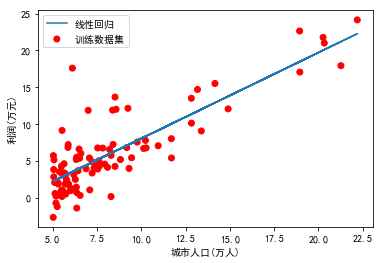

In [102]:
# plot the linear fit
plotData(X_origin, y)
print(theta)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend([ '线性回归', '训练数据集']);

$\theta$的最终值将用于预测35,000和70,000人的区域的利润。

<div class="alert alert-block alert-success">
注意，多个参数的预测问题应尽量矩阵乘法，避免采用显式求和或循环来计算.
</div>

<div class="alert alert-block alert-success">
如果`numpy.dot`的参数是一个python list， `numpy`会使用隐式转化，将其看作为一个numpy arrays再进行计算
</div>


In [103]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



### 1.4 可视化 $J(\theta)$

为了更好地理解课目标函数$J(\theta)$的形态，应了解如何将表达$\theta_0$和$\theta_1$和目标函数值在二维网格上的形状。不需要为这部分编写任何新代码，但注意阅读下列代码是如何创建这些图像的。

在下一个单元格中，代码将使用上面的“computeCost”函数在一个平面网格上计算$J(\theta)$。执行以下单元格的代码，将得到一个包含$J(\theta)$值的二维数组。然后，使用matplotlib的“plot surface”和“contourf”函数，使用这些值生成$J(\theta)$的3D表面和轮廓图。效果如下所示
![](Figures/cost_function.png)

这些图例的目的是展示$J(\theta)$如何随$ theta_0$和$theta_1$的变化而变化。目标函数$J(\theta)$是一个碗形函数，具有全局最小值。(这在等高线图中比在三维曲面图中更容易看到)。这个最小值是$\theta 0$和$\theta 1$的最优值，梯度下降的每一步都更接近这个点。

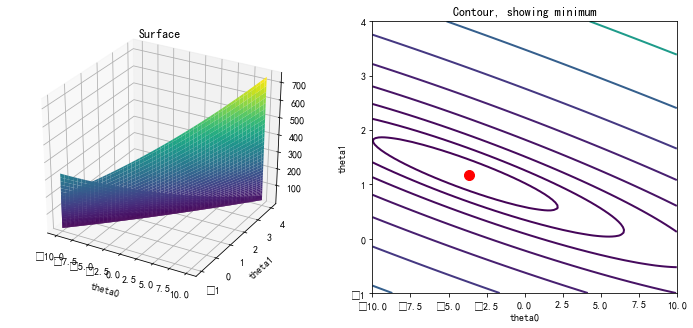

In [104]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

## 2 多变量线性回归

在本部分中，将使用多个变量实现线性回归来预测房价。如果你有更好的问题，可以搜集相应数据并建立自己的预测模型。

数据文件`Data/ex1data2.txt` 包含俄勒冈州波特兰市房价信息。第一栏是房子的大小(以平方英尺为单位)，第二栏是卧室的数量，第三栏是房子的价格。

<a id="section4"></a>

### 2.1 正则化

我们首先从这个数据集中加载和显示一些值。通过查看这些值，可以注意到房子的大小大约是卧室数量的1000倍。当特征相差数量级时，首先进行特征缩放可以使梯度下降收敛得更快。

In [105]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X_origin = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X_origin[i, 0], X_origin[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


完成 `featureNormalize`函数 :
- 从数据集中减去每个特征的平均值。
- 减去平均值后，再根据标准差按比例缩放数据(除以标准差)

标准差是一种测量数据变化程度的方法(大多数数据点在均值的2个标准差内);这是取值范围(max-min)之外的另一种选择。在`numpy`中，可以使用`std`函数来计算标准差。

* 示例

`X_origin[:, 0]`包含 $x_1$ (house sizes)的值, 可用`np.std(X_origin[:, 0])`用来计算房屋面积的标准差.


<div class="alert alert-block alert-warning">
**注意：**当进行特征标准化时，应该把得到的特征均值和方差存储起来，因为在预测时，我们仍要使用这两个参数对新输入的数据进行标准化。
</div>
<a id="featureNormalize"></a>

In [106]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X_origin.copy()
    mu = np.zeros(X_origin.shape[1])
    sigma = np.zeros(X_origin.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X_origin, axis=0)
    sigma = np.std(X_origin, axis=0)
    X_norm =(X_origin - mu)/ np.std(X_origin)
    
    # ================================================================
    return X_norm, mu, sigma

执行 `featureNormalize` 

In [107]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X_origin)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085    3.17021]
Computed standard deviation: [7.86203e+02 7.52843e-01]


测试之后 `featureNormalize`，将常数项的对应列添加到`X_norm`:

In [108]:
# Add intercept term to X
#print(X_origin)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

<a id="section5"></a>
### 2.2 梯度下降

如果你已经完善了上面单元中针对单变量回归问题实现的梯度下降方法，假设函数和之前的批梯度下降更新规则相同，现在唯一的区别是在矩阵$X$中还有一个特征。

完成计算目标函数 `computeCostMulti` 和 梯度下降函数`gradientDescentMulti`的代码，注意观察，如果你之前的代码已经支持多变量回归运算，可以直接拿来使用。

注意使用`numpy.array` 的`shape`属性来检查数据中有多少个特征。

<div class="alert alert-block alert-warning">
**实现说明:** 多变量回归的目标函数表示形式不变:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

这里

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$
</div>

与Matlab相似，numpy中提供的向量形式可以有效的表达和实现多变量运算，避免大量的循环操作。

<a id="computeCostMulti"></a>

In [109]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    n = X.shape[1]
    assert(len(theta) == n)  

    hx = np.dot(X,theta)
    dif =  hx - y
    J = np.sum(dif**2) / (2*m)  # or  J = (X @ theta - y).T @ (X @ theta - y) / (2 * m)
    
    # ==================================================================
    return J


<a id="gradientDescentMulti"></a>

In [110]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        hx = np.dot(X,theta)        
        theta -= alpha /m * np.dot(X.T, (hx - y))
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 2.2.1 选择学习速率

在这部分练习中，你会得到尝试的数据集不同的学习速度和找到快速收敛学习速度。 可以通过修改下面的代码并改变设置学习率的代码部分改变学习速率。

使用上面实现的 `gradientDescentMulti` 函数，运行 50 次，这个函数会返回当前学习速率下50次循环得到$J(\theta)$ 值。

最后一次迭代后，根据迭代次数绘制J值。

如果你选择的学习率在一个很好的范围内，你的图表如下图所示。 

![](Figures/learning_rate.png)

如果你的图表看起来很不一样，特别是如果发现你的价值$J(\theta)$在增加，甚至是发散，应该调整你的学习速度，然后再试一次。我们建议在对数标度上尝试学习率$ \alpha$的值，其乘法步长约为前一值的3倍(即0.3、0.1、0.03、0.01等)。如果这有助于您看到曲线中的总体趋势，您可能还需要调整正在运行的迭代次数。

<div class="alert alert-block alert-warning">
**实现提示:** 如果你的学习率太大，$ J(\theta))$可能会发散并“爆炸”，导致数值太大，无法用计算机计算。在这种情况下，`numpy`往往会返回

NaN，它代表“不是一个数字”，通常是由未定义的操作引起的，包括？、∞和+∞。
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB 提示:** 

为了比较不同的学习速率对收敛性的影响，在同一图上绘制几个学习速率的$J$变化曲线是很有帮助的。实现时，可以将多个`alpha`添加到一个python列表，建立针对该列表每个值的循环，并在循环的每次迭代中调用plot函数来实现。具体的多图例打印方法可以在网上搜索。
</div>

注意收敛曲线随着学习率的变化而变化。在学习速度较小的情况下，您应该会发现梯度下降需要很长时间才能收敛到最优值。反之，当学习速率较大时，梯度下降可能不收敛，甚至可能发散。所以使用你找到的最佳学习率，运行以上梯度法，直到收敛，多做测试，以找到$\theta$的最终值。接下来，用$\theta$这个值来预测一栋1640平方尺、3间卧室的房子的价格。

theta computed from gradient descent: [3.38658e+05 1.40140e+05 6.02733e+01]
(3,)
(3,)
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $276136


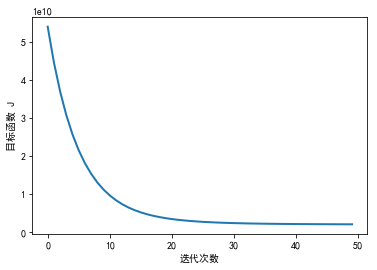

In [113]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 150 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 50

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('迭代次数')
plt.ylabel('目标函数 J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 153.29 sq-m, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
X1 = np.array([1, (1650-mu[0]) / sigma[0], (3-mu[1])/sigma[1]])
print(X1.shape)
print(theta.shape)
price = np.dot(X1,theta)   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

<a id="section7"></a>
### 3.3 正规方程（Normal Equations）

通过最小二乘法求解线性回归问题时，采用如下形式得到最小化误差的解：

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

使用这个公式不需要任何的特征缩放，你可以在一次计算中得到一个精确的解:这避免了梯度下降法中的迭代过程。

首先，我们将重新加载数据，以确保变量没有被修改。请记住，虽然不需要缩放特性，但仍然需要在$X$矩阵中添加一列1 s，以得得到截距项($\theta_0$)。下一个单元格中的代码将在X中添加全为`1`的一列。

In [116]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

根据上述过程，完成用于计算$\theta$的函数 `normalEqn`。

<a id="normalEqn"></a>

In [117]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y    
    # =================================================================
    return theta

测试：使用这个方法预测价格

In [118]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

x = np.array([1, 1650, 3])
price = np.dot(x, theta)# You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.90954   139.21067 -8738.01911]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
